In [1]:
from model import *
import skimage
import pylab
%matplotlib inline

model_path='./models/model-72'
maxlen=30

with open(vgg_path) as f:
    fileContent = f.read()
    graph_def = tf.GraphDef()
    graph_def.ParseFromString(fileContent)

images = tf.placeholder("float32", [1, 224, 224, 3])
tf.import_graph_def(graph_def, input_map={"images":images})
 
ixtoword = np.load('./data/ixtoword.npy').tolist()
n_words = len(ixtoword)

sess = tf.InteractiveSession()
 
caption_generator = Caption_Generator(
        dim_image=dim_image,
        dim_hidden=dim_hidden,
        dim_embed=dim_embed,
        batch_size=batch_size,
        n_lstm_steps=maxlen,
        n_words=n_words)

graph = tf.get_default_graph()

 
fc7_tf, generated_words_tf = caption_generator.build_generator(maxlen=maxlen)
     
saver = tf.train.Saver()
saver.restore(sess, model_path)

def captioning(test_image_path=None):

 
    pylab.imshow(skimage.io.imread(test_image_path))
    pylab.show()
    
 
    image_val = read_image(test_image_path)
    fc7 = sess.run(graph.get_tensor_by_name("import/fc7_relu:0"), feed_dict={images:image_val})
    
 
    generated_word_index= sess.run(generated_words_tf, feed_dict={fc7_tf:fc7})
    generated_word_index = np.hstack(generated_word_index)
 
    generated_words = [ixtoword[x] for x in generated_word_index]
    punctuation = np.argmax(np.array(generated_words) == '.')+1
 
    generated_words = generated_words[:punctuation]
    generated_sentence = ' '.join(generated_words)
    print generated_sentence


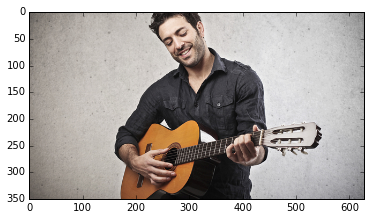

a man in a black shirt is playing a guitar .


In [7]:
captioning('./acoustic-guitar-player.jpg')

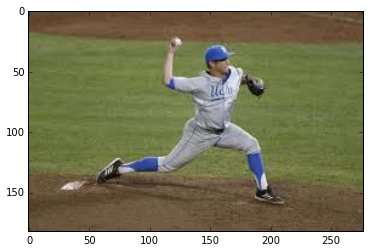

a young boy wearing a baseball game is swinging at a pitch .


In [5]:
captioning('https://encrypted-tbn2.gstatic.com/images?q=tbn:ANd9GcTl_V-lX4Vpze3JJQfVSDfanUnaBfPv61W5gBkqWfQ8Ga5aE5gD')

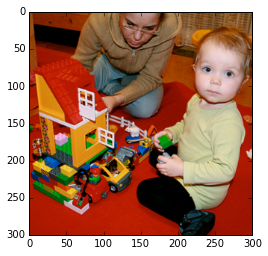

a little girl in a pink shirt is playing with a balloon .


In [8]:
captioning('http://cs.stanford.edu/people/karpathy/deepimagesent/legos.png')